In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:10<00:00, 48.6MB/s]
100% 1.06G/1.06G [00:10<00:00, 110MB/s] 


In [3]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# cresate CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 108ms/step - loss: 1.5483 - accuracy: 0.5623 - val_loss: 0.6549 - val_accuracy: 0.6100
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6423 - accuracy: 0.6369 - val_loss: 1.3474 - val_accuracy: 0.5510
Epoch 3/10
625/625 [==============================] - 69s 111ms/step - loss: 0.5338 - accuracy: 0.7158 - val_loss: 0.5961 - val_accuracy: 0.7060
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4696 - accuracy: 0.7668 - val_loss: 0.4467 - val_accuracy: 0.7898
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4109 - accuracy: 0.7926 - val_loss: 0.4797 - val_accuracy: 0.7840
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3698 - accuracy: 0.8145 - val_loss: 0.6234 - val_accuracy: 0.7536
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3170 - accuracy: 0.8426 - val_loss: 0.4274 - val_ac

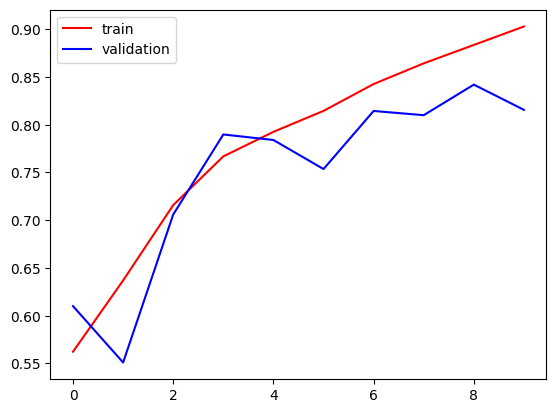

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

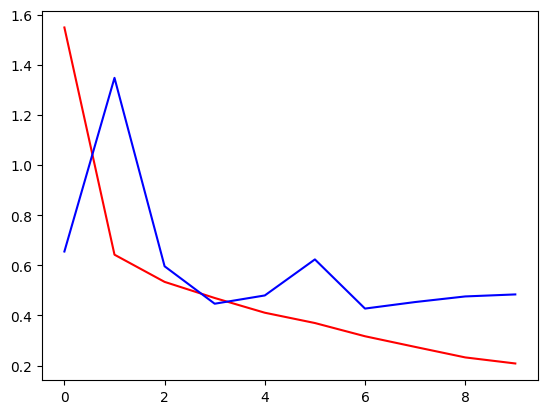

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.show()

In [13]:
# ways to reduce overfitting

# 1. Add more data
# 2. Data Augmentation
# 3. L1/L2 Regularizer
# 4. Dropout
# 5. Batch Norm
# 6. Reduce complexity

In [14]:
import cv2

In [15]:
test_img = cv2.imread('/content/dog.jpg')

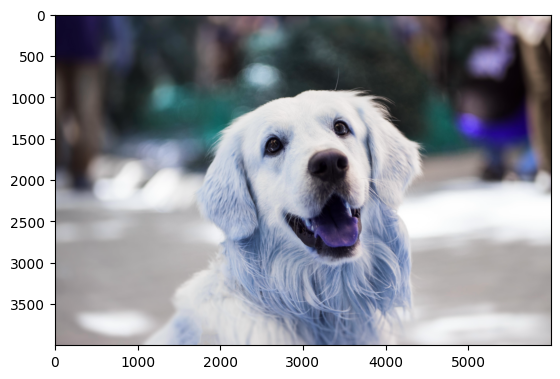

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(4000, 6000, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape((1,256,256,3))

In [20]:
model.predict(test_input)

1/1 [==============================] - 0s 232ms/step


array([[0.41596055]], dtype=float32)

In [21]:
test_img = cv2.imread('/content/cat.jpeg')

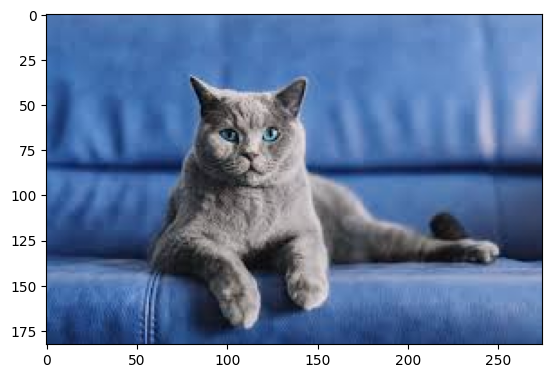

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(183, 275, 3)

In [24]:
test_img = cv2.resize(test_img, (256,256))

In [25]:
test_img = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_img)

1/1 [==============================] - 0s 19ms/step


array([[0.41596055]], dtype=float32)